<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/1.fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

2.11.0


## 1. 데이터셋 준비하기

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# 구글에서 fashion_mnist 데이터는 60000 vs 10000개로 이미 잘라서 보내줌. 옵션으로 바꿀 수 없음
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print('length:', len(x_train))
print('ndim:', x_train.ndim)
print('size:', x_train.size, 60000*28*28)
print('dtype:', x_train.dtype)
print('dtype.name:', x_train.dtype.name)

length: 60000
ndim: 3
size: 47040000 47040000
dtype: uint8
dtype.name: uint8


## 2.데이터 프리프로세싱

0
T-shirts/top


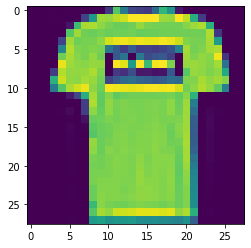

In [ ]:
class_names = ['T-shirts/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(y_train[1])
print(class_names[y_train[1]])
plt.imshow(x_train[1])

In [ ]:
print(x_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [ ]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

## 4. 모델 설계하기

In [ ]:
# 28*28 = 784   
model = Sequential([Flatten(), 
                    Dense(32, activation='relu'), 
                    Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5. 모델 학습하기

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3559 - accuracy: 0.8718 - val_loss: 0.3975 - val_accuracy: 0.8595
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3407 - accuracy: 0.8773 - val_loss: 0.3907 - val_accuracy: 0.8588
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.8812 - val_loss: 0.3889 - val_accuracy: 0.8617
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3181 - accuracy: 0.8852 - val_loss: 0.3694 - val_accuracy: 0.8682
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8873 - val_loss: 0.3755 - val_accuracy: 0.8680


## 7. 모델 검증하기

In [ ]:
model.summary()
model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.3755 - accuracy: 0.8680


[0.3755055367946625, 0.8679999709129333]

In [ ]:
print(y_train[0])

9


## 8. 모델 사용하기

In [ ]:
pred_test = model.predict(x_test)
print(pred_test[0])

313/313 [==============================] - 1s 1ms/step
[0.000 0.000 0.000 0.000 0.000 0.007 0.000 0.018 0.000 0.974]


y_test[0]는 무엇을 한다는 뜻일까?  

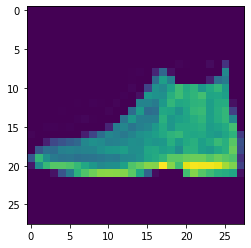

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(y_test[0])

9


## Dense Layer 에서 neuron의 수를 올리면  accuracy는 어떻게 될까요 ?

### training time은 어떻게 될까요?

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),                 
                    Dense(1024, activation="relu"),
                    Dense(256, activation="relu"),
                    Dense(256, activation="relu"),
                    Dense(256, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(32, activation="relu"),
                    Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])


model.fit(x_train, y_train,  validation_data=(x_test, y_test), epochs=5)
model.summary()
print('***evaluate model')
model.evaluate(x_test, y_test)
print('*** real test ***')
pred_test = model.predict(x_test)

print(pred_test[0])
print(y_test[0])

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.5244 - accuracy: 0.8100 - val_loss: 0.4385 - val_accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3881 - accuracy: 0.8607 - val_loss: 0.4016 - val_accuracy: 0.8567
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3486 - accuracy: 0.8741 - val_loss: 0.3875 - val_accuracy: 0.8602
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3227 - accuracy: 0.8833 - val_loss: 0.3681 - val_accuracy: 0.8698
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3049 - accuracy: 0.8892 - val_loss: 0.3524 - val_accuracy: 0.8741
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                

## 만일 마지막 Dense layer에서 output neuron의 숫자를 5로 바꾸면? 

### label의 종류가 10개인데... output은 5개라....

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),
              Dense(32, activation="relu"),
              Dense(5, activation="softmax")])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,  validation_data=(x_test, y_test),epochs=5)
model.summary()
print('***evaluate model')
model.evaluate(x_test, y_test)
print('*** real test ***')
pred_test = model.predict(x_test)

print(pred_test[0])
print(y_test[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             

## 그러면 Dense Layer를 하나 더 쌓으면 어떻게 될까요?

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),
                    Dense(32, activation="relu"),
                    Dense(32, activation="relu"),
                    Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])


model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
model.summary()
print('***evaluate model')
model.evaluate(x_test, y_test)
print('*** real test ***')
pred_test = model.predict(x_test)

print(pred_test[0])
print(y_test[0])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5668 - accuracy: 0.8041 - val_loss: 0.4605 - val_accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4160 - accuracy: 0.8524 - val_loss: 0.4322 - val_accuracy: 0.8424
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8629 - val_loss: 0.4215 - val_accuracy: 0.8472
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3597 - accuracy: 0.8698 - val_loss: 0.3933 - val_accuracy: 0.8593
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.8755 - val_loss: 0.3851 - val_accuracy: 0.8617
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 

## epochs 의 숫자를 올리면 어떻게 될까요?

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),
              Dense(32, activation="relu"),
              Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)
model.summary()
print('***evaluate model')
model.evaluate(x_test, y_test)
print('*** real test ***')
pred_test = model.predict(x_test)

print(pred_test[0])
print(y_test[0])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5491 - accuracy: 0.8100 - val_loss: 0.4698 - val_accuracy: 0.8341
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4170 - accuracy: 0.8526 - val_loss: 0.4301 - val_accuracy: 0.8451
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8624 - val_loss: 0.4109 - val_accuracy: 0.8529
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3607 - accuracy: 0.8720 - val_loss: 0.4087 - val_accuracy: 0.8526
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3434 - accuracy: 0.8759 - val_loss: 0.3993 - val_accuracy: 0.8566
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3320 - accuracy: 0.8806 - val_loss: 0.3837 - val_accuracy: 0.8623
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3211 - accuracy: 0.8818 - val_loss: 0.3624 - val_accuracy:

## 만일 데이터를 normalize를 안한다면 어떻게 될까요?

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

#x_train = x_train/255.0
#x_test = x_test/255.0

model = Sequential([Flatten(),
              Dense(32, activation="relu"),
              Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
model.summary()
print('***evaluate model')
model.evaluate(x_test, y_test)
print('*** real test ***')
pred_test = model.predict(x_test)

print(pred_test[0])
print(y_test[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3546 - accuracy: 0.3555 - val_loss: 1.4643 - val_accuracy: 0.4919
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2349 - accuracy: 0.5410 - val_loss: 1.0822 - val_accuracy: 0.5889
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9829 - accuracy: 0.6308 - val_loss: 0.9908 - val_accuracy: 0.6711
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8365 - accuracy: 0.6787 - val_loss: 0.8909 - val_accuracy: 0.6878
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7099 - accuracy: 0.7362 - val_loss: 0.7157 - val_accuracy: 0.7363
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 

## callback function을 써봅시다. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
tcallbacks = [TensorBoard('./tboard')]
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = 'checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
        save_best_only=True, 
        save_weights_only=True, 
        monitor='val_loss', 
        verbose=1)

fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),
              Dense(1024, activation="relu"),
              Dropout(0.5),
              Dense(256, activation="relu"),
              Dropout(0.5),
              Dense(256, activation="relu"),
              BatchNormalization(),
              Dense(64, activation="relu"),
              BatchNormalization(),
              Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=100, 
                    callbacks=[tcallbacks, callbacks,checkpoint, early_stopping])
model.load_weights(checkpoint_path)

model.save("fashion-mnist.h5")      

print(pred_test[0])
print(y_test[0])

Epoch 1/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.6995 - accuracy: 0.7446
Epoch 1: val_loss improved from inf to 0.49719, saving model to checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6982 - accuracy: 0.7452 - val_loss: 0.4972 - val_accuracy: 0.8208
Epoch 2/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.4966 - accuracy: 0.8216
Epoch 2: val_loss improved from 0.49719 to 0.45514, saving model to checkpoint.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4968 - accuracy: 0.8215 - val_loss: 0.4551 - val_accuracy: 0.8339
Epoch 3/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.8391
Epoch 3: val_loss improved from 0.45514 to 0.39475, saving model to checkpoint.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4512 - accuracy: 0.8392 - val_loss: 0.3948 - val_accuracy: 0.8544
Epoch 4/100
1873/1875 [============================>.] -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./tboard

## 연습문제: 그러면 위의 사례를 종합해서 가장 좋은 성능을 내는 모델을 만드세요 ~~~

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

early_stopping = EarlyStopping(monitor='val_loss', patience=15)
checkpoint_path = 'checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
        save_best_only=True, 
        save_weights_only=True, 
        monitor='val_loss', 
        verbose=1)

fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) ,  (x_test, y_test) = fmnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([Flatten(),
              Dense(1024, activation="relu"),
              Dense(128, activation="relu"),
              Dense(64, activation="relu"),
              Dense(32, activation="relu"),
              Dense(10, activation="softmax")])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=50, 
                    callbacks=[checkpoint, early_stopping])
model.load_weights(checkpoint_path)

model.save("fashion-mnist.h5")      


Epoch 1/50
1859/1875 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.8197
Epoch 00001: val_loss improved from inf to 0.44177, saving model to checkpoint.ckpt
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4949 - accuracy: 0.8199 - val_loss: 0.4418 - val_accuracy: 0.8416
Epoch 2/50
1875/1875 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.8652
Epoch 00002: val_loss improved from 0.44177 to 0.39695, saving model to checkpoint.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8652 - val_loss: 0.3970 - val_accuracy: 0.8587
Epoch 3/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.3323 - accuracy: 0.8789
Epoch 00003: val_loss improved from 0.39695 to 0.35924, saving model to checkpoint.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3319 - accuracy: 0.8790 - val_loss: 0.3592 - val_accuracy: 0.8716
Epoch 4/50
1857/1875 [=========================

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 1,083,338
Trainable params: 1,083,338
Non-trainable params: 0
_________________________________________________________________


# 같은 Fashion Mnist 를 CNN으로 구현해 보자
### 결과가 어떻게 될까요?

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = 'checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
        save_best_only=True, 
        save_weights_only=True, 
        monitor='val_loss', 
        verbose=1)

fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential([
        Conv2D(32, (2,2), padding='same', input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (2, 2), padding='same', activation='relu'), 
        MaxPooling2D(2, 2),
        Flatten(), 
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=50, 
                    callbacks=[checkpoint, early_stopping])

model.load_weights(checkpoint_path)
model.save("fashion-mnist.h5")      



Epoch 1/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.5253 - accuracy: 0.8208
Epoch 1: val_loss improved from inf to 0.32055, saving model to checkpoint.ckpt
1875/1875 [==============================] - 20s 4ms/step - loss: 0.5244 - accuracy: 0.8210 - val_loss: 0.3206 - val_accuracy: 0.8860
Epoch 2/50
1860/1875 [============================>.] - ETA: 0s - loss: 0.3443 - accuracy: 0.8783
Epoch 2: val_loss improved from 0.32055 to 0.29188, saving model to checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3446 - accuracy: 0.8783 - val_loss: 0.2919 - val_accuracy: 0.8982
Epoch 3/50
1868/1875 [============================>.] - ETA: 0s - loss: 0.3048 - accuracy: 0.8923
Epoch 3: val_loss improved from 0.29188 to 0.25877, saving model to checkpoint.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3045 - accuracy: 0.8924 - val_loss: 0.2588 - val_accuracy: 0.9080
Epoch 4/50
1871/1875 [============================>.] - ET

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("fashion-mnist.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               4

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9204


[0.23280847072601318, 0.9204000234603882]